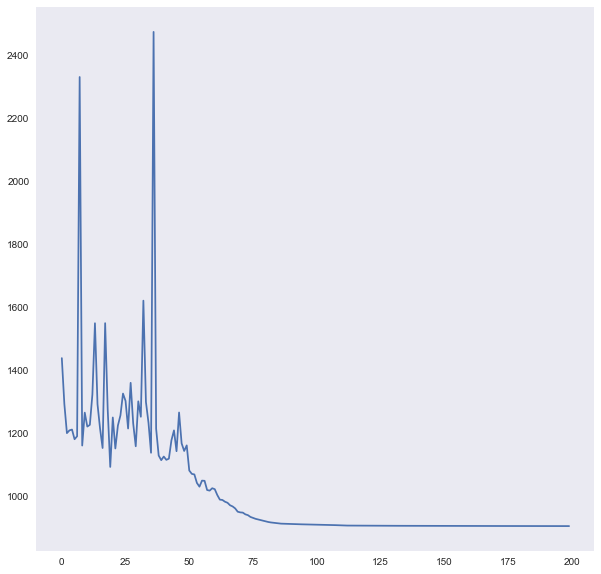

In [206]:
def plot(coordList):
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("dark")
    fig = plt.figure()
    ax = plt.subplot(111)
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)


def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        plotpretify(ax, iters)
        plt.show()
    return answer


def incircle(crds, r=1):
    return np.power(crds[0], 2) + np.power(crds[1], 2) < r


def spawn(r=1):
    x = random.uniform(-r, r)
    limits = [-np.sqrt(r**2 - x**2), np.sqrt(r**2 - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]


# Good score when somewhere < 2
def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(i, len(coord)):
            if i != j:
                totalDist += 1 / abs(
                    math.hypot(coord[j][0] - coord[i][0],
                               coord[j][1] - coord[i][1]))
    return totalDist


def perturb(newPoint, temp):
    plusmin = [1 if random.random() < 0.5 else -1 for i in range(len(newPoint))]
    perturbs = [((la.norm(newPoint)*np.random.uniform(0,temp))/2)*psmn for psmn in plusmin]
    newPoint[0] = newPoint[0] + perturbs[0]
    newPoint[1] = newPoint[1] + perturbs[1]
    return newPoint

def move(k, coord, temp, rate):
    F = np.array([0.0, 0.0])
    velocity = np.zeros(2, float)
    for l in coord:
        if any(l != k):
            # Methode 1:
            r = np.array(k) - np.array(l)
            F1 = (r / (np.linalg.norm(r)**3) * rate)
            F += F1

            # Methode2:
            force = 1 / (np.sum(r**2)**2)
            velocity += (r * force * rate)
    newPoint = k + F
    newPoint = perturb(newPoint, temp)
    if not incircle(newPoint, radius):
        newPoint = newPoint / la.norm(newPoint)
    return newPoint, F


def changeCoord(coord, temp, rate):
    coordTemp = []
    score = checkScore(coord)
#     print("NEW ROUND!!!! ************************************************")
    fav = []
    for i, k in enumerate(coord):
        cT, favo = move(k, coord, temp, rate)
        coordTemp.append(cT)
        fav.append(favo)
    if score > checkScore(coordTemp):
#     print(np.mean(fav), temp)
        return np.array(coordTemp)
    elif temp > random.random():
        return np.array(coordTemp)
    else:
        return changeCoord(coord, temp, rate)
        

coordList = []
radius = 1
pointsNum = 40
iterations = 200
rate = 0.0005
schemeData = getScheme_data(iterations, plot="No")

for i in range(pointsNum):
    coordList.append(spawn(radius))
coordList = np.array(coordList)

coordList = np.array(coordList)
checklist = []
coordListList = [coordList]
for i in range(iterations):
    temp = schemeData[i]
#     np.exp(-i / iterations) / 10
    coordList = changeCoord(coordList, temp, rate)
    checklist.append(checkScore(coordList))
    coordListList.append(coordList)
plt.plot(checklist)
plt.show()

In [208]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def showPlot(i=0):
    plot(coordListList[i])
    
# showPlot(coordListList)
y=interactive(showPlot, i=(0,len(coordListList)-1,1))
display(y)

interactive(children=(IntSlider(value=0, description='i', max=200), Output()), _dom_classes=('widget-interact'…